In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

In [3]:
print(data.shape)

(272, 2)


### Initialize your cluster centers

In [4]:
def initialize_clusters(data, k, seed=0):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """

    # set seed
    np.random.seed(seed)
    
    # build centroids
    clusters = data.max()*np.random.rand(k,data.shape[1]) + data.min()
    
    return clusters

In [5]:
data = np.array([[1,2,3],[-10,1,5]])
k = 4
print(initialize_clusters(data, k))

[[-7.25593248 -6.42405317 -6.98618312]
 [-7.27558409 -7.881726   -6.77052943]
 [-7.81206394 -5.541135   -5.1816862 ]
 [-8.08279241 -6.04137481 -7.3555254 ]]


### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [6]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    
    distance_list = []
    num_cluster, _ = mu.shape
    
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
        
    return np.matrix(distance_list).T

#### Update k-means parameters

In [37]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """

    
    # distances to centroids 
    d_old = build_distance_matrix(data, mu_old)

    # min distance 
    ind_min = np.argmin(d_old, axis=1)
    
    # assign data to cluster
    z = np.zeros((data.shape[0], mu_old.shape[0]))
    for n in range(data.shape[0]):
        z[n,ind_min[n]] = 1
    z = z.astype(int)

    # update centroids
    mu = np.zeros(mu_old.shape)
    for k in range(z.shape[1]):
        n_k = sum(z,0)[k]
        if n_k != 0:
            mu[k,:] = (1/n_k) * (z.T[k,:] @ data)
        else:
            mu[k,:] = mu_old[k,:]
    
    # loss
    loss = np.multiply(build_distance_matrix(data, mu), z)
    
    return loss, z, mu

In [38]:
data = np.array([[1,2,0],[1,1,0],[-10,1,5],[-4,1,5]])
mu_old = np.array([[0,0,0],[-9,1,4],[10,10,10]])
print('data=', data)

loss, z, mu = update_kmeans_parameters(data, mu_old)

print('---------------------------')
print('z=', z)
print('mu=', mu)
print('loss=', loss)


data= [[  1   2   0]
 [  1   1   0]
 [-10   1   5]
 [ -4   1   5]]
---------------------------
z= [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]]
mu= [[  1.    1.5   0. ]
 [ -7.    1.    5. ]
 [ 10.   10.   10. ]]
loss= [[ 0.25  0.    0.  ]
 [ 0.25  0.    0.  ]
 [ 0.    9.    0.  ]
 [ 0.    9.    0.  ]]



#### Play with k-means

In [39]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold, seed, display=True):
    """run the k-means algorithm."""
    
    output_figure = "kmeans_figures/"
    
    # initialize the cluster
    mu_old = initialize_clusters(data, k, seed)
    
    # store
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        
        if display:
            print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
            
        # output plot
        if display:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter+1))
        
        # update k-means information.
        mu_old = mu
        
    return mu, assignments, loss_list[-1]

The current iteration of k-means is: 0,                the average loss is 54.22149428375031.


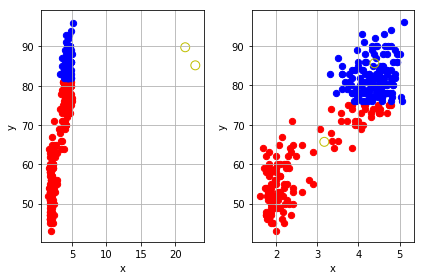

The current iteration of k-means is: 1,                the average loss is 26.76561449656668.


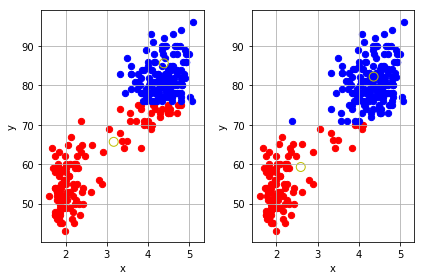

The current iteration of k-means is: 2,                the average loss is 17.405128715663576.


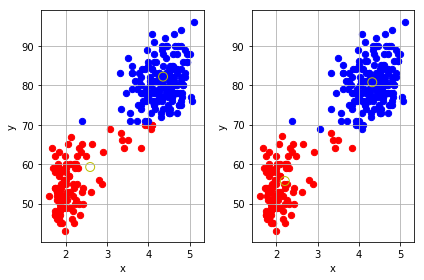

The current iteration of k-means is: 3,                the average loss is 16.405100411213798.


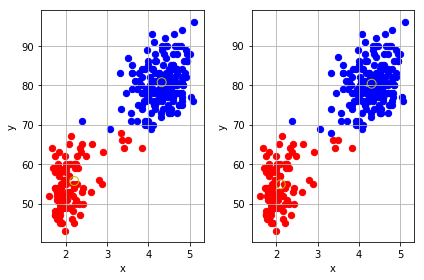

The current iteration of k-means is: 4,                the average loss is 16.363545442917665.


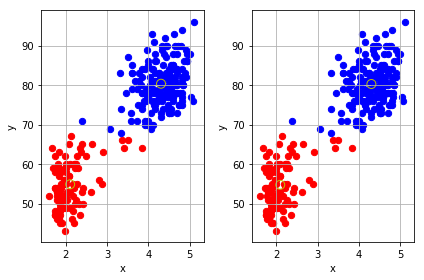

The current iteration of k-means is: 5,                the average loss is 16.363545442917665.


In [40]:
from helper import load_data, normalize_data

# load data
data = load_data()

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"
seed = 5

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
mu, z, loss = kmeans(data, k, max_iters, threshold, seed)

## Optimize K

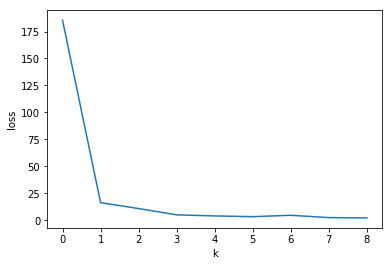

In [11]:
# define parameters
k_max = 10
max_iters = 10
threshold = 1e-5
seed = 1

# store losses
losses = []

for k in range(1,k_max):
    
    # run kmeans algorithm
    mu, z, loss = kmeans(data, k, max_iters, threshold, seed, display=False)
    
    # store loss
    losses.append(loss)

plt.figure()
plt.plot(losses)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()
    

## Using k-means for image compresson

#### load image

In [12]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [13]:
print(type(original_image))
print(original_image.shape)
imgR = original_image[:,:,0]
imgG = original_image[:,:,1]
imgB = original_image[:,:,2]
print(imgB.max())
print(imgB.min())

<class 'numpy.ndarray'>
(480, 480, 3)
254
0


In [41]:
def preprocess_image(original_image):
    """preprocess the image."""

    # vectorize
    processed_image = original_image.reshape((original_image.shape[0]*original_image.shape[1],3))
                            
    return processed_image

processed_image = preprocess_image(original_image)

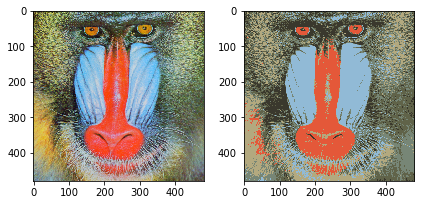

In [86]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold, seed=0, display=False):
    """using k-means for image compression."""

    # run kmeans algorithm
    mu, assignments, loss = kmeans(processed_image, k, max_iters, threshold, seed, display)

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters                        
k = 6
max_iter = 100
threshold = 1

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold, display=False)